Data https://data.world/data-society/city-of-baltimore-crime-data


This dataset contains information about crimes of baltimore city

In [1]:
#https://www.kaggle.com/bburnet/baltimore-crime-eda-visualization-folium-map
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("CrimeBaltimore.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276529 entries, 0 to 276528
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        276529 non-null  object 
 1   CrimeTime        276529 non-null  object 
 2   CrimeCode        276529 non-null  object 
 3   Location         274322 non-null  object 
 4   Description      276529 non-null  object 
 5   Inside/Outside   266250 non-null  object 
 6   Weapon           95577 non-null   object 
 7   Post             276305 non-null  float64
 8   District         276449 non-null  object 
 9   Neighborhood     273789 non-null  object 
 10  Longitude        274325 non-null  float64
 11  Latitude         274325 non-null  float64
 12  Location 1       274325 non-null  object 
 13  Premise          265772 non-null  object 
 14  Total Incidents  276529 non-null  int64  
dtypes: float64(3), int64(1), object(11)
memory usage: 31.6+ MB


In [3]:
data.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


In [4]:
data.describe()

,Post,Longitude,Latitude,Total Incidents
count,276305.000000,274325.000000,274325.000000,276529.0
mean,506.256821,-76.617444,39.307399,1.0
std,260.735370,0.042306,0.029556,0.0
min,2.000000,-76.711620,39.200410,1.0
25%,243.000000,-76.648460,39.288330,1.0
50%,511.000000,-76.613960,39.303640,1.0
75%,731.000000,-76.587440,39.327810,1.0
max,945.000000,-76.528500,39.372930,1.0


### Data Description

CrimeDate - Date when crime took place   
CrimeTime - Time when crime has happened    
CrimeCode - Code of crime  
Location - Location  
Description - Description about the crime  
Inside/Outside - Whether crime has occured inside or outside  
Weapon - Weapon used for crime  
Premise - Premise of crime location(Townhouse, Downtown, Hills etc)  
District - District  
Neighborhood - Neighborhood  
Longitude - Longitude of crime location 
Latitude - Latitude of crime location
Total Incidents - Number of incidents took place  

In [5]:
# Shape of data
data.shape

(276529, 15)

In [6]:
# Columns 
data.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'Total Incidents'],
      dtype='object')

In [7]:
# Datatypes of each column
data.dtypes

CrimeDate           object
CrimeTime           object
CrimeCode           object
Location            object
Description         object
Inside/Outside      object
Weapon              object
Post               float64
District            object
Neighborhood        object
Longitude          float64
Latitude           float64
Location 1          object
Premise             object
Total Incidents      int64
dtype: object

In [8]:
# Unique districts in maryland
print(f" Unique Districts : {data['District'].unique()}")

 Unique Districts : ['SOUTHERN' 'CENTRAL' 'NORTHERN' 'SOUTHEASTERN' 'NORTHWESTERN' 'EASTERN'
 'SOUTHWESTERN' 'NORTHEASTERN' 'WESTERN' nan]


In [9]:
data['Inside/Outside'].unique()

array(['I', 'O', 'Outside', nan, 'Inside'], dtype=object)

Here Outside, Inside should be mapped to O or I

In [10]:
data['Inside/Outside']=data['Inside/Outside'].map({"I":"Inside","O":"Outside"})

In [11]:
# Now unnecessary columns were removed
data['Inside/Outside'].unique()

array(['Inside', 'Outside', nan], dtype=object)

In [12]:
data['Inside/Outside'].value_counts()

Inside     131999
Outside    129782
Name: Inside/Outside, dtype: int64

### Determining missing values

In [13]:
# Check whether dataset contains missing values or not
data.isna().sum().any()

True

In [14]:
# Check for columns which are missing values
data.isna().any()

CrimeDate          False
CrimeTime          False
CrimeCode          False
Location            True
Description        False
Inside/Outside      True
Weapon              True
Post                True
District            True
Neighborhood        True
Longitude           True
Latitude            True
Location 1          True
Premise             True
Total Incidents    False
dtype: bool

In [15]:
# Check for missing values
data.isna().sum()

CrimeDate               0
CrimeTime               0
CrimeCode               0
Location             2207
Description             0
Inside/Outside      14748
Weapon             180952
Post                  224
District               80
Neighborhood         2740
Longitude            2204
Latitude             2204
Location 1           2204
Premise             10757
Total Incidents         0
dtype: int64

### Visualization of missing values

<AxesSubplot:>

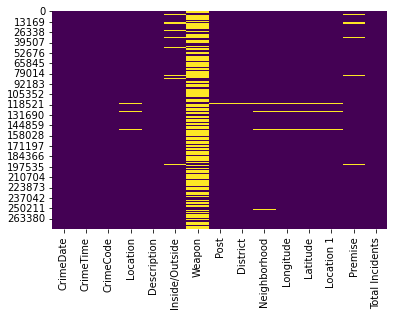

In [16]:
sns.heatmap(data.isna(),cbar=False,cmap='viridis')

Out of all columns weapon has more number of missing values

In [17]:
#Frequency of missing values
freq=data.isna().sum()/(len(data))*100
freq

CrimeDate           0.000000
CrimeTime           0.000000
CrimeCode           0.000000
Location            0.798108
Description         0.000000
Inside/Outside      5.333256
Weapon             65.436898
Post                0.081004
District            0.028930
Neighborhood        0.990854
Longitude           0.797023
Latitude            0.797023
Location 1          0.797023
Premise             3.890008
Total Incidents     0.000000
dtype: float64

### Rename columns

In [18]:
data = data.rename(columns={"Location":"CrimeLocation"})

In [19]:
data.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'CrimeLocation', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'Total Incidents'],
      dtype='object')

### Check the data types. Which columns are coded to the incorrect type? If any, correct them.

In [20]:
# Convert CrimeDate object to datetime
data['CrimeDate']=pd.to_datetime(data['CrimeDate'])
data['CrimeDate'].dtypes

dtype('<M8[ns]')

In [21]:
data.dtypes

CrimeDate          datetime64[ns]
CrimeTime                  object
CrimeCode                  object
CrimeLocation              object
Description                object
Inside/Outside             object
Weapon                     object
Post                      float64
District                   object
Neighborhood               object
Longitude                 float64
Latitude                  float64
Location 1                 object
Premise                    object
Total Incidents             int64
dtype: object

### Exploratory Data Analysis


<AxesSubplot:xlabel='Inside/Outside', ylabel='count'>

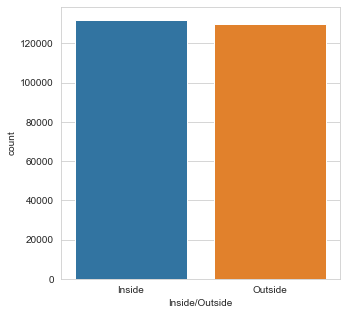

In [22]:
plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
sns.countplot(x="Inside/Outside",data=data)

Total count of crimes are almost same(Inside and Outside)

Let's make a seperate dataframe for weapon null values

In [23]:
data1=data[data['Weapon'].isnull()]
data1.head()

,CrimeDate,CrimeTime,CrimeCode,CrimeLocation,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
1,2017-09-02,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,Outside,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
5,2017-09-02,22:00:00,5A,CHERRYCREST RD,BURGLARY,Inside,NaN,922.0,SOUTHERN,Cherry Hill,-76.62131,39.24867,"(39.2486700000, -76.6213100000)",ROW/TOWNHO,1
7,2017-09-02,21:35:00,3B,400 W LANVALE ST,ROBBERY - STREET,Outside,NaN,123.0,CENTRAL,Upton,-76.62789,39.30254,"(39.3025400000, -76.6278900000)",STREET,1
12,2017-09-02,20:55:00,6C,5100 PARK HEIGHTS AVE,LARCENY,NaN,NaN,614.0,NORTHWESTERN,Central Park Heights,-76.67511,39.34861,"(39.3486100000, -76.6751100000)",NaN,1
14,2017-09-02,20:00:00,6D,5500 SUMMERFIELD AVE,LARCENY FROM AUTO,Outside,NaN,444.0,NORTHEASTERN,Frankford,-76.54270,39.33288,"(39.3328800000, -76.5427000000)",YARD,1


In [24]:
data1['Weapon'].value_counts()

Series([], Name: Weapon, dtype: int64)

<AxesSubplot:xlabel='count', ylabel='Description'>

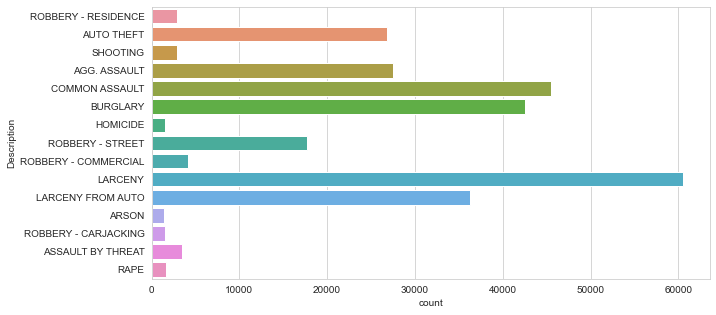

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(y = data['Description'])  #Original dataset

<AxesSubplot:xlabel='count', ylabel='Description'>

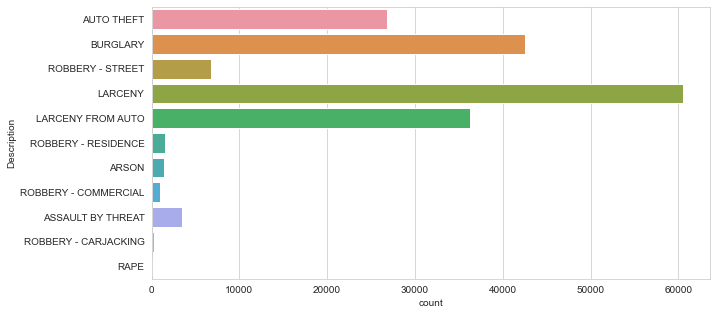

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(y= data1['Description'])    #Dataset with weapons as null values

Comparing the two types of crime committed with weapons versus null weapons, it is reasonable to assume that null values for weapons means that there was no weapon involved. Let's replace the nulls with "NO WEAPON".

In [27]:
data['Weapon']=data['Weapon'].fillna("No Weapon")

In [28]:
# Drop missing values
data=data.dropna()

In [29]:
# Now dataset has no missing values
data.isna().sum()

CrimeDate          0
CrimeTime          0
CrimeCode          0
CrimeLocation      0
Description        0
Inside/Outside     0
Weapon             0
Post               0
District           0
Neighborhood       0
Longitude          0
Latitude           0
Location 1         0
Premise            0
Total Incidents    0
dtype: int64

We already have latitute and longitute so we dont need location 1

In [30]:
# Drop location 1 
data=data.drop(['Location 1'],axis=1)

In [31]:
data.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'CrimeLocation', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Premise', 'Total Incidents'],
      dtype='object')

#### Seperate CrimeDate column to date,month and year

In [32]:
data.head()

,CrimeDate,CrimeTime,CrimeCode,CrimeLocation,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Premise,Total Incidents
0,2017-09-02,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,Inside,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,ROW/TOWNHO,1
1,2017-09-02,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,Outside,No Weapon,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,STREET,1
3,2017-09-02,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,Inside,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,ROW/TOWNHO,1
4,2017-09-02,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,Outside,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,STREET,1
5,2017-09-02,22:00:00,5A,CHERRYCREST RD,BURGLARY,Inside,No Weapon,922.0,SOUTHERN,Cherry Hill,-76.62131,39.24867,ROW/TOWNHO,1


In [33]:
data['Date']=data['CrimeDate'].dt.day
data['Month']=data['CrimeDate'].dt.month
data['Year']=data['CrimeDate'].dt.year
data['Weekday'] = data['CrimeDate'].dt.weekday+1

In [34]:
data.head()

,CrimeDate,CrimeTime,CrimeCode,CrimeLocation,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Premise,Total Incidents,Date,Month,Year,Weekday
0,2017-09-02,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,Inside,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,ROW/TOWNHO,1,2,9,2017,6
1,2017-09-02,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,Outside,No Weapon,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,STREET,1,2,9,2017,6
3,2017-09-02,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,Inside,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,ROW/TOWNHO,1,2,9,2017,6
4,2017-09-02,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,Outside,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,STREET,1,2,9,2017,6
5,2017-09-02,22:00:00,5A,CHERRYCREST RD,BURGLARY,Inside,No Weapon,922.0,SOUTHERN,Cherry Hill,-76.62131,39.24867,ROW/TOWNHO,1,2,9,2017,6


In [35]:
data['CrimeTime']=pd.to_datetime(data['CrimeTime'])

In [36]:
data['Hour']=data['CrimeTime'].dt.hour

#### Crimes by year

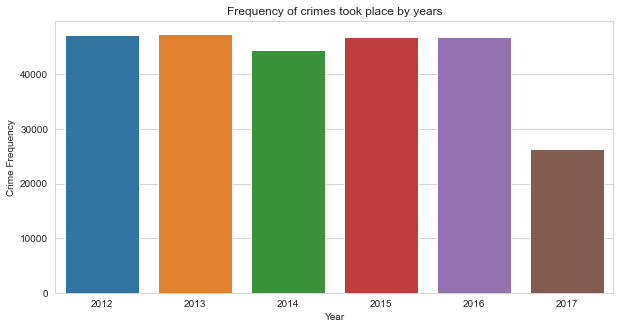

In [40]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.countplot(x="Year",data=data)
plt.title("Frequency of crimes took place by years")
plt.xlabel("Year")
plt.ylabel("Crime Frequency")
plt.show()

#### Crimes by month

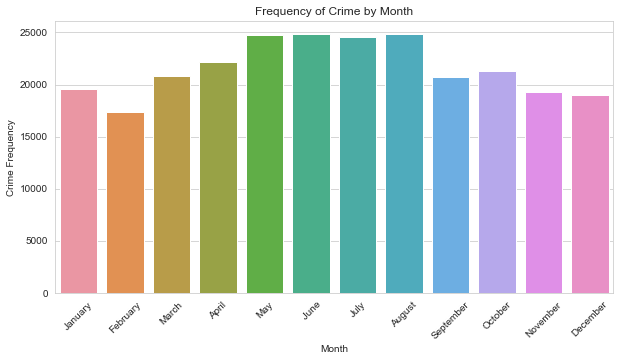

In [41]:
plt.figure(figsize=(10,5))
fig=sns.countplot(x="Month",data=data)
plt.title('Frequency of Crime by Month')
plt.xlabel("Month")
plt.ylabel("Crime Frequency")
labels=['January', 'February', 'March', 'April', 'May',' June', 'July','August','September','October','November','December']
fig.set_xticklabels(labels)
plt.xticks(rotation=45)
plt.show()

Most of the crime cases took place mid years i.e., May, June, July, August

#### Crimes by Dates

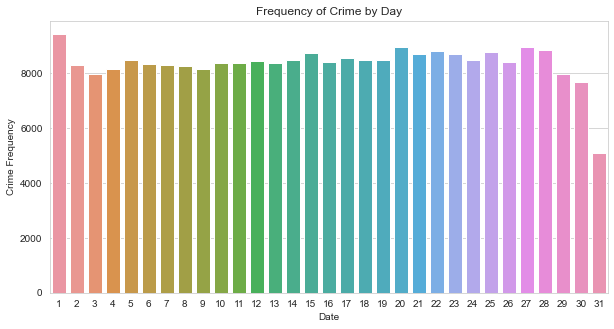

In [42]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.countplot(x="Date",data=data)
plt.title('Frequency of Crime by Day')
plt.xlabel("Date")
plt.ylabel("Crime Frequency")
plt.show()

Generally, Least cases were happening end of the month

#### Crimes by hour

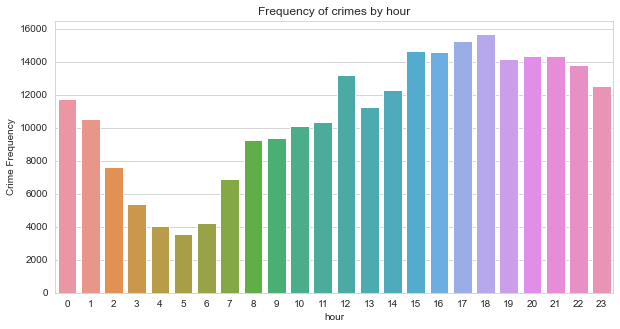

In [43]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.countplot(x="Hour",data=data)
plt.title('Frequency of crimes by hour')
plt.xlabel("hour")
plt.ylabel("Crime Frequency")
plt.show()

Most of the crime cases had took place in the evening, specifically around 6pm

#### Crimes by weekdays

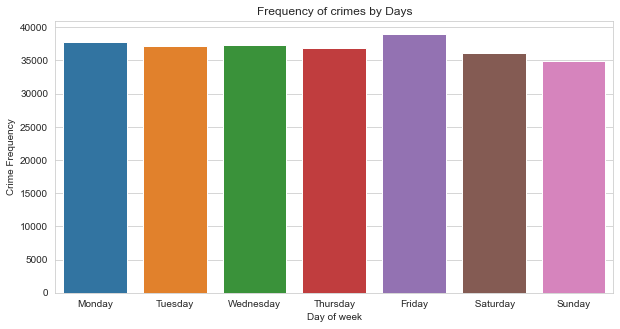

In [46]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
fig=sns.countplot(x="Weekday",data=data)
plt.title('Frequency of crimes by Days')
plt.xlabel("Day of week")
plt.ylabel("Crime Frequency")
labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday']
fig.set_xticklabels(labels)
plt.show()

Compared to weekdays, on weekends crime count is less

#### Crimes with weapons

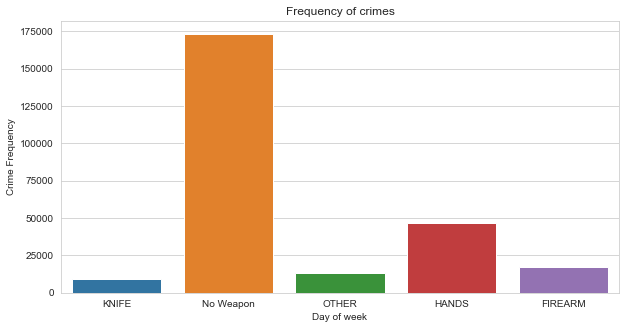

In [47]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
fig=sns.countplot(x="Weapon",data=data)
plt.title('Frequency of crimes')
plt.xlabel("Day of week")
plt.ylabel("Crime Frequency")
plt.show()

Without considering "No Weapon", In most crimes were hands were used

#### Crimes by Districts

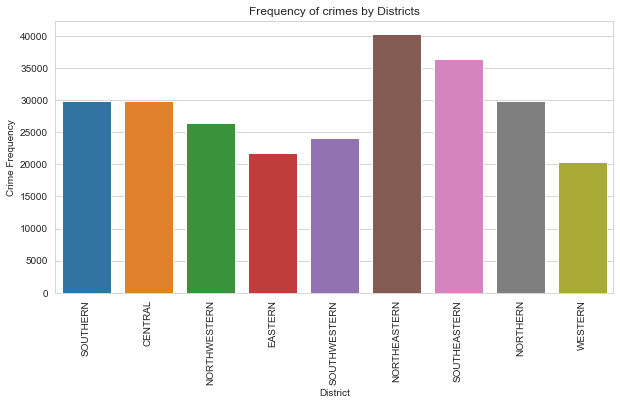

In [48]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
fig=sns.countplot(x="District",data=data)
plt.title('Frequency of crimes by Districts')
plt.xlabel("District")
plt.ylabel("Crime Frequency")
plt.xticks(rotation=90)
plt.show()

Many crimes were taken place in North Easern and least at Eastern

#### Crimes by Districts with Inside or Outside

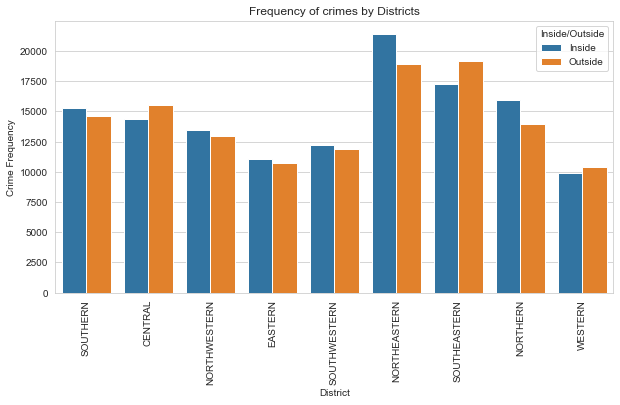

In [49]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
fig=sns.countplot(x="District",data=data,hue='Inside/Outside')
plt.title('Frequency of crimes by Districts')
plt.xlabel("District")
plt.ylabel("Crime Frequency")
plt.xticks(rotation=90)
plt.show()

In NorthEastern many cases happened Inside of house, where as SouthEastern has More Outside, Eastern and Western has least cases

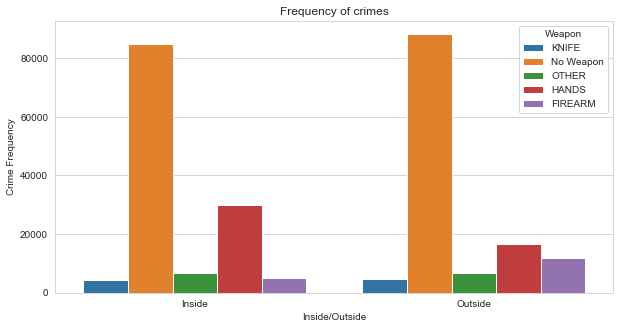

In [50]:
plt.figure(figsize=(10,5))
fig=sns.countplot(x ='Inside/Outside', hue='Weapon',data=data)
plt.title('Frequency of crimes')
plt.xlabel("Inside/Outside")
plt.ylabel("Crime Frequency")
labels=["Inside","Outside"]
fig.set_xticklabels(labels)
plt.show()

Generally, Both Inside and Outside crimes taken place by Hands

#### Major crime types in Baltimore

<AxesSubplot:>

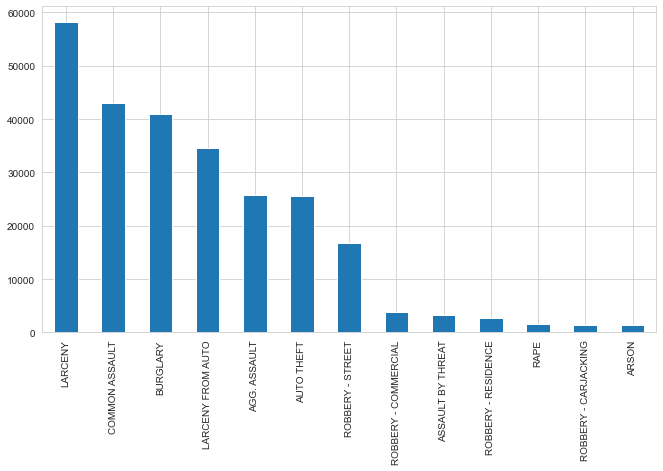

In [51]:
data['Description'].value_counts().plot.bar(figsize=(11, 6))

Larceny is the most frequent kind of crime

In [52]:
data.corr()

,Post,Longitude,Latitude,Total Incidents,Date,Month,Year,Weekday,Hour
Post,1.000000,-0.525339,-0.199788,NaN,-0.004455,-0.003058,0.016545,0.000275,0.002585
Longitude,-0.525339,1.000000,-0.022024,NaN,0.001955,0.001579,-0.003207,0.007413,-0.013059
Latitude,-0.199788,-0.022024,1.000000,NaN,-0.000176,0.005781,-0.011653,-0.023130,0.013707
Total Incidents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,-0.004455,0.001955,-0.000176,NaN,1.000000,-0.006502,0.003821,-0.004259,0.008067
Month,-0.003058,0.001579,0.005781,NaN,-0.006502,1.000000,-0.075026,0.003496,0.002840
Year,0.016545,-0.003207,-0.011653,NaN,0.003821,-0.075026,1.000000,-0.007126,-0.000615
Weekday,0.000275,0.007413,-0.023130,NaN,-0.004259,0.003496,-0.007126,1.000000,-0.028861
Hour,0.002585,-0.013059,0.013707,NaN,0.008067,0.002840,-0.000615,-0.028861,1.000000


<AxesSubplot:>

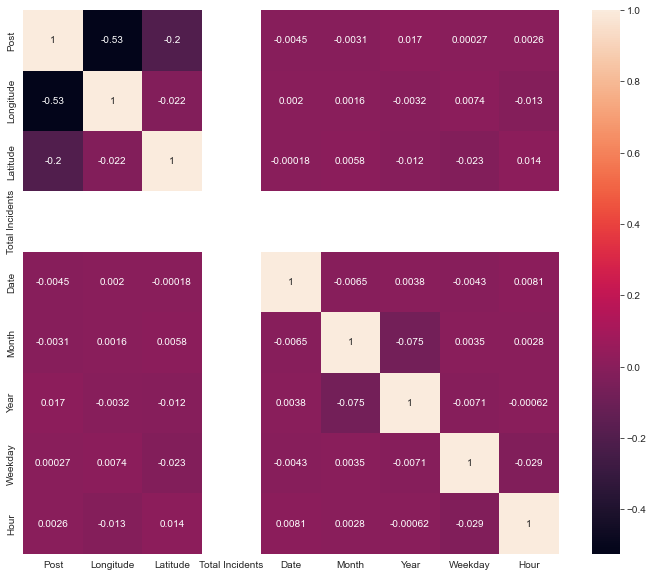

In [53]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

## Conclusion

1. Most of the crimes took place evening.   
2. There were less crimes commited at night hours  
3. Most commited crimes are on Fridays  
4. Most of the crime cases took place mid years i.e., May, June, July, August 
5. Number of incidents are almost similar in all years  
6. Most of crimes are by using hands
7. Larceny is the most frequent kind of crime